# **EXPLORATORY DATA ANALYSIS ON SUPERSTORE DATA**
 
  
  

![alt text](superstore.jpg "Superstore")


# Introduction

This EDA project analyzes and visualizes a data set from a superstore. This project aims to study current retail sales trends and patterns in order to answer the following questions:

1. Which market segments are losing money?
2. Which market segments are seeing significant gains?
3. Every industry gives discounts on purchases, but do they make enough money from those reductions to cover their costs?
4. Which shipment class increases which category's sales?

# Importing necessary libraries

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
%matplotlib inline 

# Data Cleaning
Checking the dataset for anomalies

In [3]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
#Removing the 'Country' and 'Postal Code' columns
del df['Country']
del df['Postal Code']
df.isna().sum()

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
# Checking the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Region        9994 non-null   object 
 5   Category      9994 non-null   object 
 6   Sub-Category  9994 non-null   object 
 7   Sales         9994 non-null   float64
 8   Quantity      9994 non-null   int64  
 9   Discount      9994 non-null   float64
 10  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 859.0+ KB


In [6]:
print('ShipModes: ', df['Ship Mode'].unique())
print('\nSegments: ', df['Segment'].unique())
print('\nStates: ', df['State'].unique())
print('\nThere are ', df['State'].nunique(), ' states in this dataset')
print('\nCategories: ', df['Category'].unique())

ShipModes:  ['Second Class' 'Standard Class' 'First Class' 'Same Day']

Segments:  ['Consumer' 'Corporate' 'Home Office']

States:  ['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']

There are  49  states in this dataset

Categories:  ['Furniture' 'Office Supplies' 'Technology']


In [7]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


# Task 1: Which market segments are losing money?

In [8]:
loss_df = df[df['Profit']<0]  # Losses are negative 'Profit' values
loss_df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522


,Sales,Quantity,Discount,Profit
Segment,,,,
Consumer,247196.2460,3651,476.76,-84945.7112
Corporate,131860.5383,2191,272.00,-44787.2076
Home Office,89650.3705,1198,150.98,-26398.3669


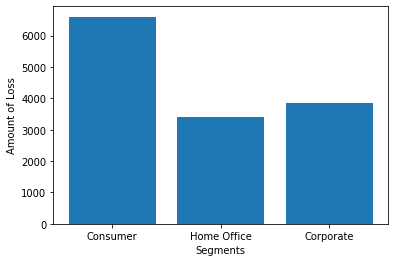

In [9]:
display(loss_df.groupby('Segment').sum().sort_values('Profit'))

loss_df1 = loss_df.copy()
loss_df1['Profit'] = loss_df1['Profit'] * -1
loss_df1.rename(columns={'Profit': 'Loss'}, inplace=True)
plt.bar(loss_df1['Segment'], loss_df1['Loss'])
plt.xlabel('Segments')
plt.ylabel('Amount of Loss')
plt.show()

Consumer products lose the most money

In [10]:
loss_df.groupby('Sub-Category').sum().sort_values('Profit')

,Sales,Quantity,Discount,Profit
Sub-Category,,,,
Binders,36140.6130,2456,452.40,-38510.4964
Tables,104978.5460,757,74.15,-32412.1483
Machines,72456.2530,157,25.60,-30118.6682
Bookcases,48072.7408,422,37.99,-12152.2060
Chairs,91988.4560,876,61.40,-9880.8413
Appliances,3382.5340,235,53.60,-8629.6412
Phones,35797.8400,476,46.60,-7530.6235
Furnishings,12845.8440,597,88.60,-6490.9134
Storage,37869.0720,569,32.20,-6426.3038


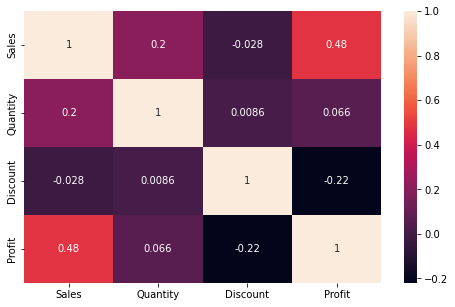

In [24]:
sns.heatmap(df.corr(), annot=True)
plt.rcParams["figure.figsize"] = (8,5)
plt.show()

As we can see from the heatmap, Profit and Discount have the highest negative correlation. This means that the higher the discount, the lower the profit.

Binders and Tables are been sold in the largest quantities and also have the highest discounts which leads to having high losses.

### What state lost the most money?

,State,Loss
20,Texas,36813.1875
15,Ohio,21750.0002
17,Pennsylvania,21602.8515
6,Illinois,19501.6975
14,North Carolina,11557.9854


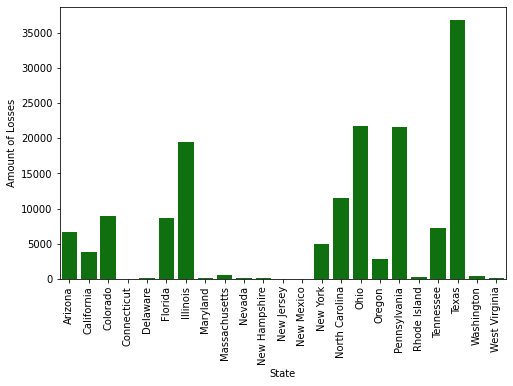

In [23]:
state_loss = pd.DataFrame(loss_df1.groupby('State')['Loss'].sum().reset_index())
display(state_loss.sort_values('Loss', ascending=False).head(5))

sns.barplot(x=state_loss['State'], y=state_loss['Loss'], data=state_loss, color='g')
plt.xlabel('State')
plt.ylabel('Amount of Losses')
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,5) # increasing the size of the plot
plt.show()

The states where the most losses are made are in Texas, Ohio, Pennsylvania, Illinois and North Carolina

# Task 2: Which market segments are seeing significant gains

,Segment,Profit
0,Consumer,219064.9204
1,Corporate,136766.3416
2,Home Office,86697.0454


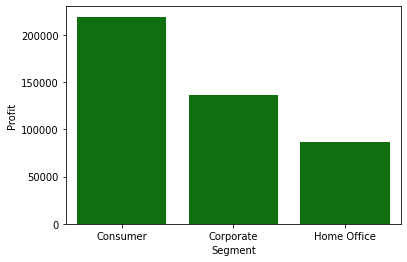

In [13]:
gain_df = df[df['Profit']>0]
max_seg = gain_df.groupby('Segment')['Profit'].sum()
max_seg = pd.DataFrame(max_seg).reset_index()
display(max_seg)

segment = [segment  for segment, df in df.groupby('Segment')]

sns.barplot(x=segment, y=max_seg['Profit'], data=max_seg, color='g')
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.show()

## What city has the highest sales in all categories?

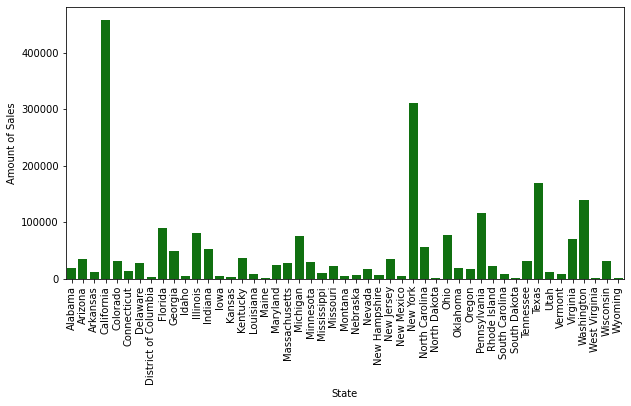

In [20]:
state_sales = pd.DataFrame(df.groupby('State')['Sales'].sum().reset_index())

sns.barplot(x=state_sales['State'], y=state_sales['Sales'], data=state_sales, color='g')
plt.xlabel('State')
plt.ylabel('Amount of Sales')
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,5)  # increasing the size of the plot
plt.show()

Carlifornia has the largest amount of sales

# Task 3: Do the market segments make enough money from given discounts to cover their costs?

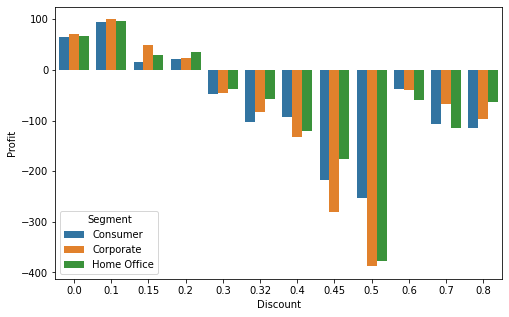

In [21]:
sns.barplot(x='Discount', y='Profit', data=df, hue='Segment', ci=None)
plt.rcParams["figure.figsize"] = (8,5)
plt.show()


The items sold with higher discounts yield more losses than those with lesser discounts

# Task 4: Which shipment class increases a category's sales?

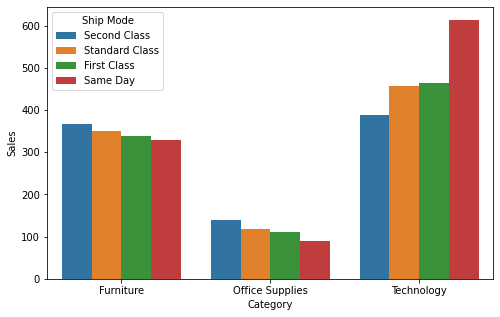

In [22]:
sns.barplot(x='Category', y='Sales', data=df, hue='Ship Mode', ci=None)
plt.rcParams["figure.figsize"] = (8,5)
plt.show()

Furniture and Office Supplies shipped with the Second Class shipment mode produce more sales than other shipment modes.

Same day shipment of Technology produces the highest sales in that category

# Recommendations

1. Discounts should be reduced or totally removed since there is a relatively high demand for Binders and Tables. More discounts should be given to the least sold items such as Fasteners, Supplies, Machines and Appliances to boost their sales.
2. Advertisement and marketing activities should be increased in the states Texas, Ohio, Pennsylvania, Illinois and North Carolina to boost sales.
3. Home office equipment sales should be improved by placing more advertisements about the sub-category targeting relevant markets.